In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = "../data/componentes"

with open(f'{path}/autovectores_2dpca.csv', 'r') as f:
    autovalores = np.array([float(x) for x in f.readline().split()])
    autovectores = np.array([np.array([float(x) for x in line.split()]) for line in f.readlines()])


lists = []
with open(f'{path}/media_desviacion_pca.txt', 'r') as f:  # replace 'file.txt' with your file pat
    array_string = ""
    for line in f:
        stripped_line = line.strip()
        if stripped_line.startswith('['):
            array_string += stripped_line[1:] + " "
        elif stripped_line.endswith(']'):
            array = np.fromstring(array_string, sep=' ')
            lists.append(array.tolist())
            array_string = ""
        else:
            array_string += stripped_line + " "


mean = np.array(lists[0] + [0.29, 0.29]).reshape(56 * 2, 46 * 2)
sd = np.array(lists[1] + [0.17, 0.17]).reshape(56 * 2, 46 * 2)

# Implementacion 2dpca

In [46]:
# PCA proper
def imagen_a_componentes(imagenes, k):
    coordenadas_componentes = []

    for imagen in imagenes:
        # La coordenada i-esima es el feature vector i de la imagen
        imagen_estandarizada = (imagen - mean) / sd
        coordenadas = np.array([imagen_estandarizada @ autovectores[i] for i in range(k)])

        coordenadas_componentes.append(coordenadas)

    return coordenadas_componentes

def componentes_a_imagen(componentes):
    imagen = np.zeros(shape=(56 * 2, 46 * 2))

    for i in range(len(componentes)):
        imagen += np.array(componentes[i]).reshape(-1, 1) @ autovectores[i].reshape(-1, 1).T

    return imagen * sd + mean 

def eigenface(componentes, i):    
    imagen = np.array(componentes[i]).reshape(-1, 1) @ autovectores[i].reshape(-1, 1).T

    return imagen * sd + mean 


# Eigenfaces

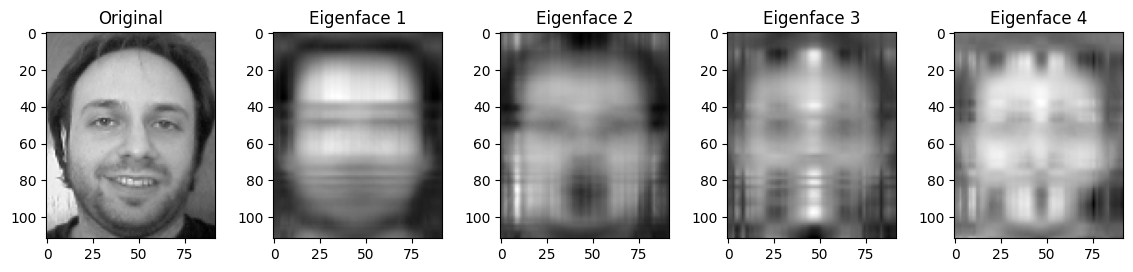

In [49]:
def load_imagen(indice_persona, indice_imagen):
    matriz_imagen = plt.imread(f"../data/caras/s{indice_persona}/{indice_imagen}.pgm") / 255

    return matriz_imagen

f, axarr = plt.subplots(1, 5, figsize=(11.5, 11.5))

f.tight_layout()

imagen_test = load_imagen(1, 1)
axarr[0].imshow(imagen_test, cmap='gray')
axarr[0].title.set_text('Original')

imagen_menor_dimension = imagen_a_componentes([imagen_test], 30)[0]    

for i in range(0, 4):    
    axarr[i + 1].imshow(eigenface(imagen_menor_dimension, i), cmap='gray')   
    axarr[i + 1].title.set_text(f'Eigenface {i + 1}')


# Reconstruccion imagenes

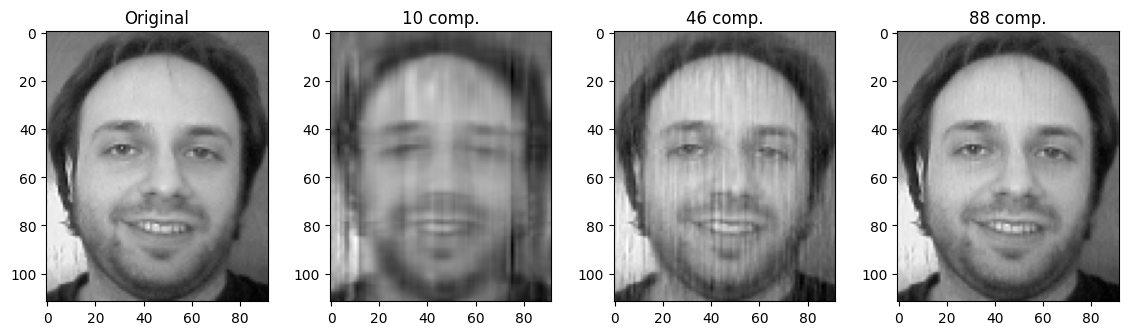

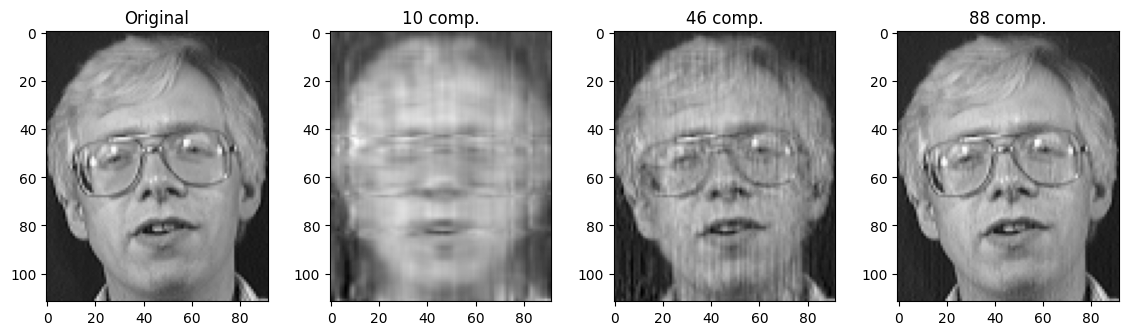

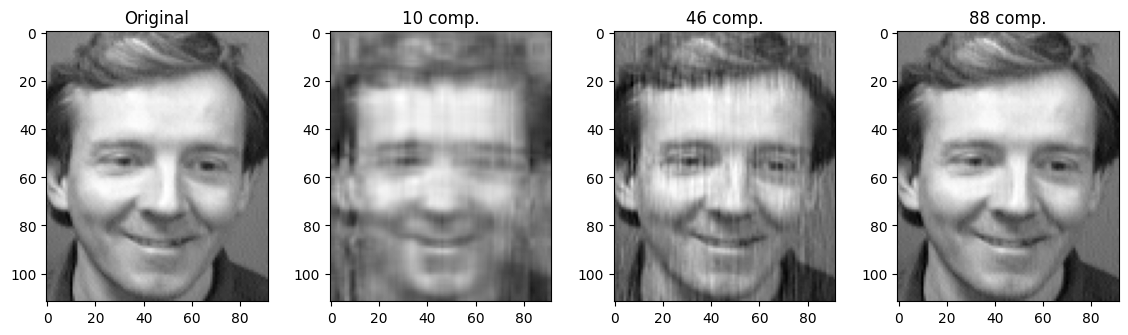

In [29]:
def ver_pca(indice_persona, indice_imagen):
    cant_componentes = [10, 46, len(autovalores) - 4]

    f, axarr = plt.subplots(1, len(cant_componentes) + 1, figsize=(11.5, 11.5))

    f.tight_layout()

    imagen_test = load_imagen(indice_persona, indice_imagen)
    axarr[0].imshow(imagen_test, cmap='gray')
    axarr[0].title.set_text('Original')

    imagen_menor_dimension = imagen_a_componentes([imagen_test], 30)[0]
    imagen_reconstruida = componentes_a_imagen(imagen_menor_dimension)

    for i in range(len(cant_componentes)):
        imagen_menor_dimension = imagen_a_componentes([imagen_test], cant_componentes[i])[0]
        imagen_reconstruida = componentes_a_imagen(imagen_menor_dimension)

        axarr[i + 1].imshow(imagen_reconstruida, cmap='gray')
        axarr[i + 1].title.set_text(f'{cant_componentes[i]} comp.')

    plt.show()

ver_pca(1, 1)
ver_pca(2, 1)
ver_pca(3, 1)

Text(0.5, 0, 'Componente')

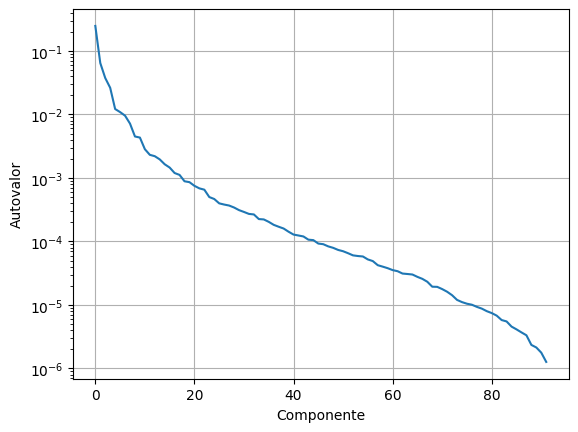

In [17]:
plt.plot(abs(autovalores))
plt.grid()
plt.yscale('log')
plt.ylabel('Autovalor')
plt.xlabel('Componente')